# CASO PRÁCTICO

Trabajamos como científicos de datos para una empresa de retail que, debido al cambio en los hábitos de consumo de los clientes, está potenciando ampliamente el servicio de venta online. La empresa quiere realizar un modelo de aprendizaje automático para clasificar a los clientes en función de la probabilidad de generar ingresos al comprar en la web.

El objetivo es realizar una serie de acciones específicas para los clientes que es más probable que hagan compras en la web. Dichas acciones son las sisguientes:

1. Realización de un análisis de las variables del dataset de Google Analytics como pueden ser
histogramas, boxplots, etc. Cualquier otro análisis es bienvenido, siempre explicándolo y con un
sentido de negocio.

2. Tratamiento de los valores faltantes, outliers, etc., en caso de que los hubiese. Si hay valores con
missings, habrá que eliminarlos con el método de Pandas llamado Dropna().a.

3. Tratamiento de categóricas, pasándolas a numéricas por medio de dummies, mapeándolas o uti-
lizando un label encoder. Hay que justificar las operaciones que se realizan.

4. Si existe alguna variable que se necesite borrar, habrá que borrara y justificarlo.

5. Estandariza los datos.

6. Dividir los datos en train y en test. Con los datos de train se pretende ajustar modelos con
CrossValidation y GridSearch.
Utilizar un modelo lineal. Entre los modelos lineales están las regresiones logísticas, las regresiones
lineales, etc. Utilizar un modelo de redes neuronales. Utilizar cualquier otro modelo de clasificación.

7. Optimizar algún parámetro de cada modelo utilizando CrossValidation y GridSearch, o de la
forma que se estime oportuna, siempre justificándolo.

8. Elegir el mejor modelo de los tres según la métrica ROC en CrossValidation. Predecir Test y
obtener una métrica estimada.

9. Umbralizar las probabilidades utilizando el umbral que maximice el área bajo la curva ROC.

10. El entregable final será un Jupyter Notebook en el que se realicen todos los análisis y los modelos.

El primer paso a realizar es **cargar las librerias** que vamos a usar.

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

El segundo paso es **cargar los datos** que van a ser usados y realizamos una primera visualización de los mismos

In [2]:
dato = pd.read_csv('./online_shoppers_intention.csv', sep= ',', index_col=False)

In [3]:
dato.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
dato.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0.0,0.0,0.0,0.0,3.0,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


Una vez cargas las librerias y los datos que vamos a usar, procederemos a relaizar las disitntas tareas solicitadas por la empresa.

##        1.    REALIZACIÓN DE UN ANALISIS DE VARIABLES DEL DATASET

Veamos la estructura de nuestro dataset y hagamos una descripción del mismo.

In [5]:
print(u'- El número de filas  es: {}'.format(dato.shape[0]))
print(u'- El número de columnas  es: {}'.format(dato.shape[1]))
print(u'- Las variables son: {}'.format(list(dato.columns)))

- El número de filas  es: 12330
- El número de columnas  es: 18
- Las variables son: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


In [6]:
dato.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [7]:
dato.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Antes de continuar con el analisis de los datos, vamos a preprocesar los datos para poder tener mejores visualizaciones de los mismos.

# PREPROCESAMIENTO DE DATOS

## 2. TRATAMIENTO DE VALORES FALTANTES

In [8]:
# MISSINGS

dato.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Como observamos tenemos 14 valores faltantes. Como se nos pide, vamos a proceder a eliminarnos.

In [9]:
datos= dato.dropna(axis=0)

In [10]:
datos.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Al eliminar las filas con valores faltante, vamos que nos queda un dataframe con 12.316 filas, es decir, se han eliminado 14 filas.

## 3. TRATAMIENTO DE LAS VARIABLES CATEGORICAS

Necesitamos convertir las variables categóricas a numericas para poder introducirlas en el modelo de aprendizaje automático. Para ello, vamos a ver cuales de nuestras variables predictoras son de este tipo y ver comoo las podemos trasofrmar a numericas de una en una.

In [11]:
datos.select_dtypes(exclude=['number']).columns

Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

### Month

In [12]:
datos['Month'].value_counts()

May     3363
Nov     2998
Mar     1894
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Vamos a  hacer un mapeo de los valores de cada mes a su equivalente numerico, sinedo para enero 1, febrero 2 y así hasta diciembre 12. Para ello vamos a hacer uso de un diccionario para ir mapeando los valores de uno a uno como comentamos antes.

In [13]:
dic = {'Feb':2, 'Mar':3, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
datos['Month'].replace(dic, inplace=True)

In [14]:
datos['Month'].value_counts()

5     3363
11    2998
3     1894
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month, dtype: int64

Como vemos, se ha realizado el cambio correctamente.

### VisitorType

En este caso, vamos a trasformar los valores adjudicando valor 1 a los visitantes que vuelven y 0 para los demás.

In [15]:
datos['VisitorType'].value_counts()

Returning_Visitor    10537
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

Vamos a elminar las filas para las que el tipo de visitante recibe el valor 'Other' ya que es despreciable y no nos aporta información para el análisis que estamos realizando

In [16]:
filtro= datos[datos['VisitorType']=='Other'].index
datos= datos.drop(filtro)

In [17]:
datos.loc[datos['VisitorType'] == 'New_Visitor', 'VisitorType'] = 0
datos.loc[datos['VisitorType'] == 'Returning_Visitor', 'VisitorType'] = 1
datos.VisitorType = datos.VisitorType.astype(int)

In [18]:
datos['VisitorType'].value_counts()

1    10537
0     1694
Name: VisitorType, dtype: int64

### Weekend

In [19]:
datos['Weekend'].value_counts()

False    9373
True     2858
Name: Weekend, dtype: int64

In [20]:
datos.Weekend = datos.Weekend.astype(str)

Trasformamos el falso por el valor 0 y el verdaderos por valor 1. Vamos a  ahcer uso del diccionario de nuevo. Para poder trasformar un booleano a un entero vaamso a hacer una trasformación intermedia a una cadena de texto o string.


In [21]:
dic2 = {'False': 0, 'True': 1}
datos['Weekend'].replace(dic2, inplace=True)

In [22]:
datos['Weekend'].value_counts()

0    9373
1    2858
Name: Weekend, dtype: int64

### Revenue

In [23]:
datos['Revenue'].value_counts()

False    10339
True      1892
Name: Revenue, dtype: int64

Para este atributo vamos a hacer lo msimo que en el apartado anterior. Para los casos que se ha producido alguna compra y por ende hay un ingreso le vamos a adjudicar el valor 1. En el caso contrario le adjudicaremos 0.


In [24]:
datos.Revenue = datos.Revenue.astype(str)

In [25]:
datos['Revenue'].replace(dic2, inplace=True)

In [26]:
datos['Revenue'].value_counts()

0    10339
1     1892
Name: Revenue, dtype: int64

Una vez realizadas las trasformaciones, vamos a comprobar que ya no hay más tipos no numericos.

In [27]:
datos.select_dtypes(exclude=['number']).columns

Index([], dtype='object')

No usamos Level Enconder ya que a todas estas variables se les puede adjudicar un orden por lo que lo hacemos manualmente.

## DIVISIÓN EN FEATURES X Y TARGET Y

In [28]:
x = datos.drop('Revenue', axis=1)

Y = datos['Revenue']

Vamos a hacer una representación usando los **gráficos de cajas** para ver la distribucion de las  variables. Para ello, vamos a normalizar las distintas variables para facilitar la posterior representación en un mismo gráfico.

In [29]:
x_norm = ((x-x.mean())/x.std())

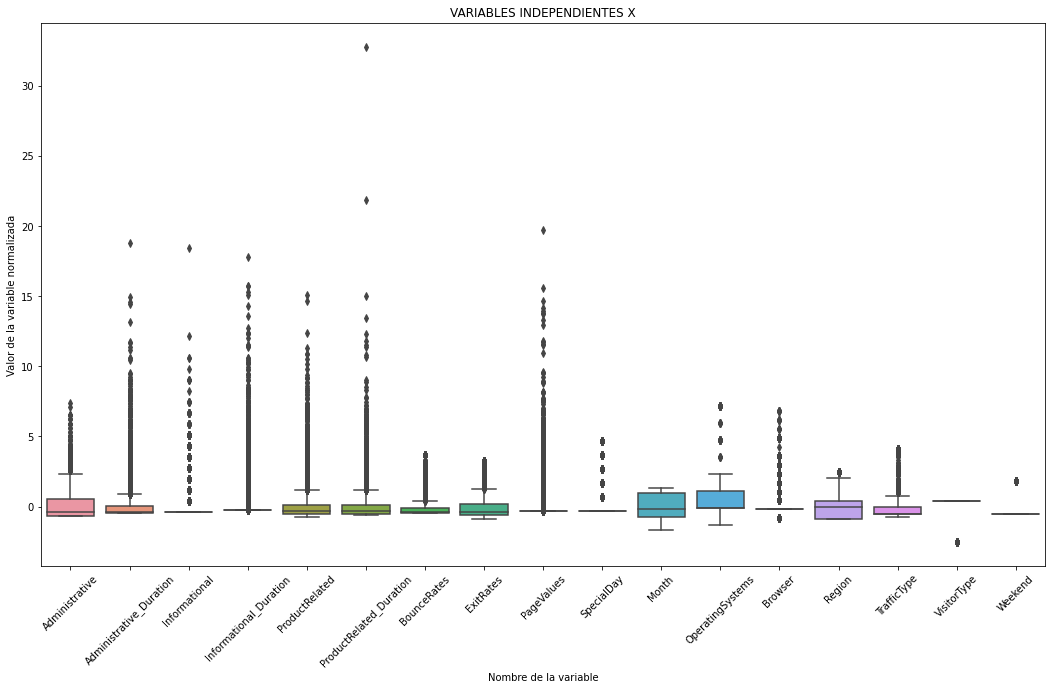

In [30]:
plt.figure(figsize=(18,10))
ax = sns.boxplot(data=x_norm)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title(u'VARIABLES INDEPENDIENTES X')
plt.ylabel('Valor de la variable normalizada')
_ = plt.xlabel('Nombre de la variable')

Vamos a usar el gráfico conocido por **histograma** para ver las distribución de las variabels de otra manera.


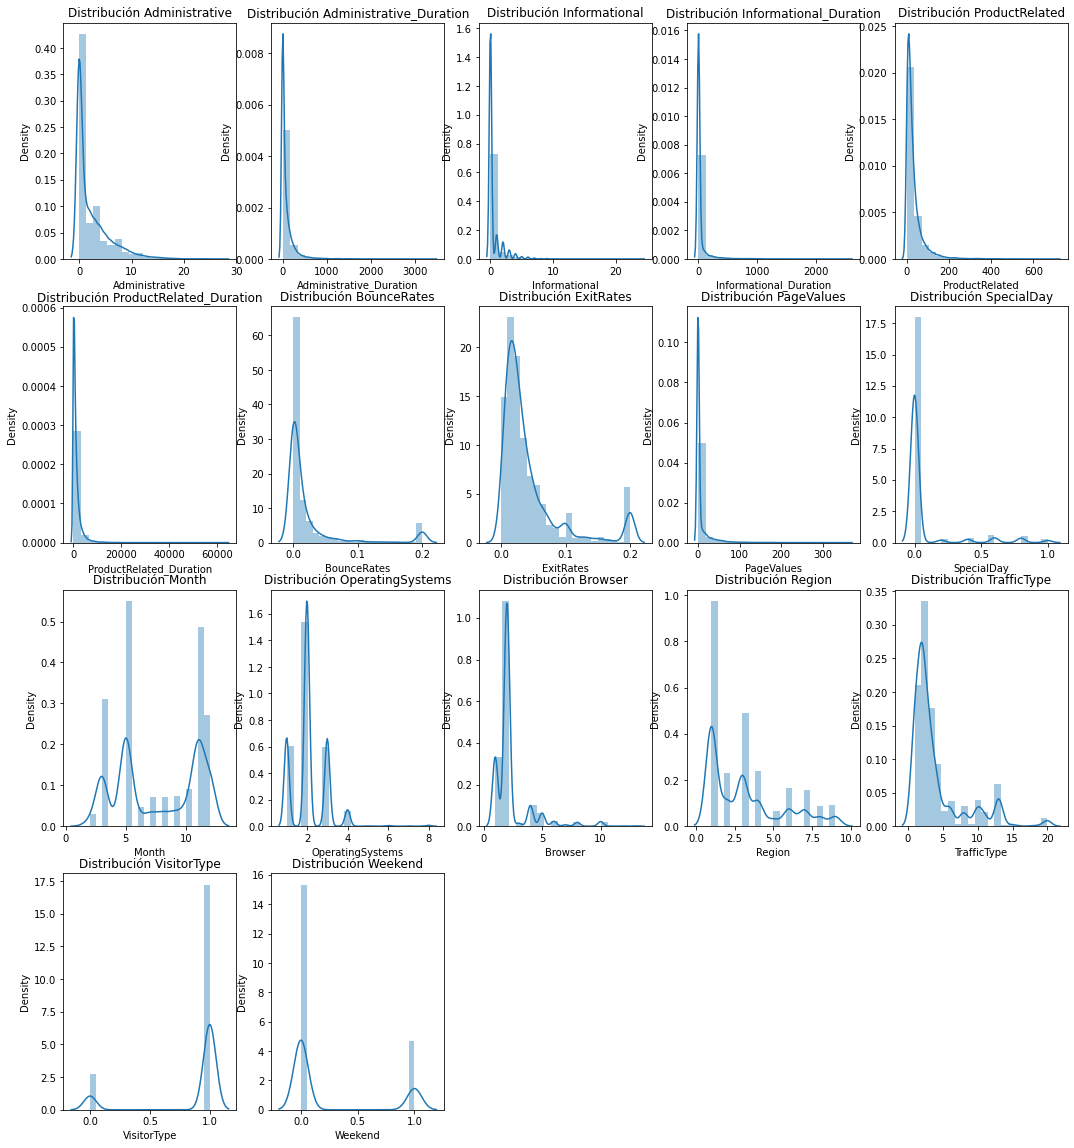

In [31]:
plt.figure(figsize=(18,20))
n = 0
for i, column in enumerate(x.columns):
    n+=1
    plt.subplot(4, 5, n)
    sns.distplot(x[column], bins=20)
    plt.title('Distribución {}'.format(column))
plt.show()

Vamos a ver la relación entre la variable target y las distintas variables predictoras.


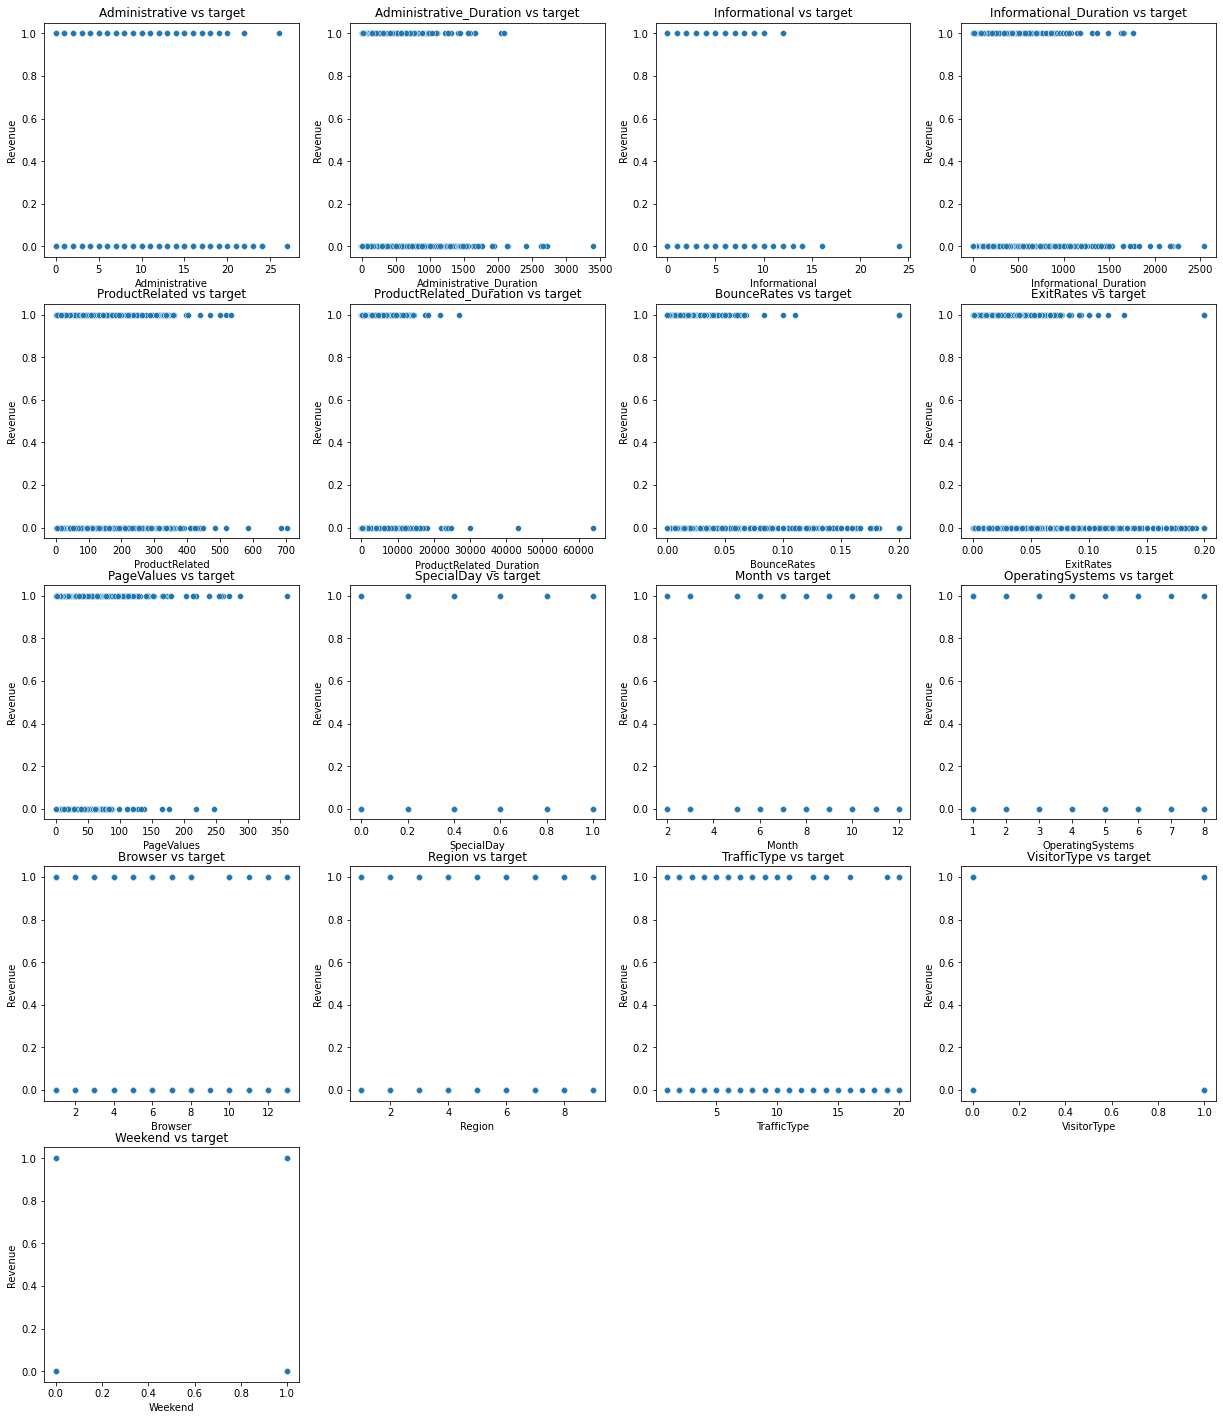

In [32]:
fig_tot = (len(x.columns))
fig_por_fila = 4.
tamanio_fig = 4.
num_filas = int( np.ceil(fig_tot/fig_por_fila) )    
    
plt.figure( figsize=( fig_por_fila*tamanio_fig+5, num_filas*tamanio_fig+5 ) )
c = 0 
for i, col in enumerate(x.columns):
    plt.subplot(num_filas, fig_por_fila, i+1)
    sns.scatterplot(x=x[col], y=Y)
    plt.title( '%s vs %s' % (col, 'target') )
    plt.ylabel('Revenue')
    plt.xlabel(col)
plt.show()
    
    

Con estos gráficos se puede ver si hay variables que discriminan.

Como podemos ver en bonce rantes la gente que no compra tienen valores más altos. Lo mismo sucede para Exit rates.

A continuación vamos a ver como se distribuyen estas variables segun si las personas acaban comprando o no.

In [33]:
def represento_doble_hist(x_1, x_0, n_bins=15, title='', label_1='Clase 1', 
                          label_0='Clase 0', density=0):
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha=0.5, label=label_1, color='blue')    
    plt.hist(x_0, bins, density = density, alpha=0.5, label=label_0, color='red')
    plt.title(title)
    plt.legend(loc='best') 



def histograma_doble_salida (x, y, nbins=30, density=0, revenues=(0,1)):    
    
    fig_tot = len(x.columns)
    fig_tot_fila = 4.
    fig_tamanio = 4.
    num_filas = int( np.ceil(fig_tot/fig_tot_fila) )


    plt.figure( figsize=( fig_tot_fila*fig_tamanio+2, num_filas*fig_tamanio+2 ) )
    revenues_neg, revenues_pos = revenues
    for i, feat in enumerate(x.columns):
        plt.subplot(num_filas, fig_tot_fila, i+1);
        plt.title('%s' % feat)
        idx_pos = y == revenues_pos
        idx_neg = y == revenues_neg
        represento_doble_hist(x[feat][idx_pos].values, x[feat][idx_neg].values, nbins, density = density, title=('%s' % feat))
        
        

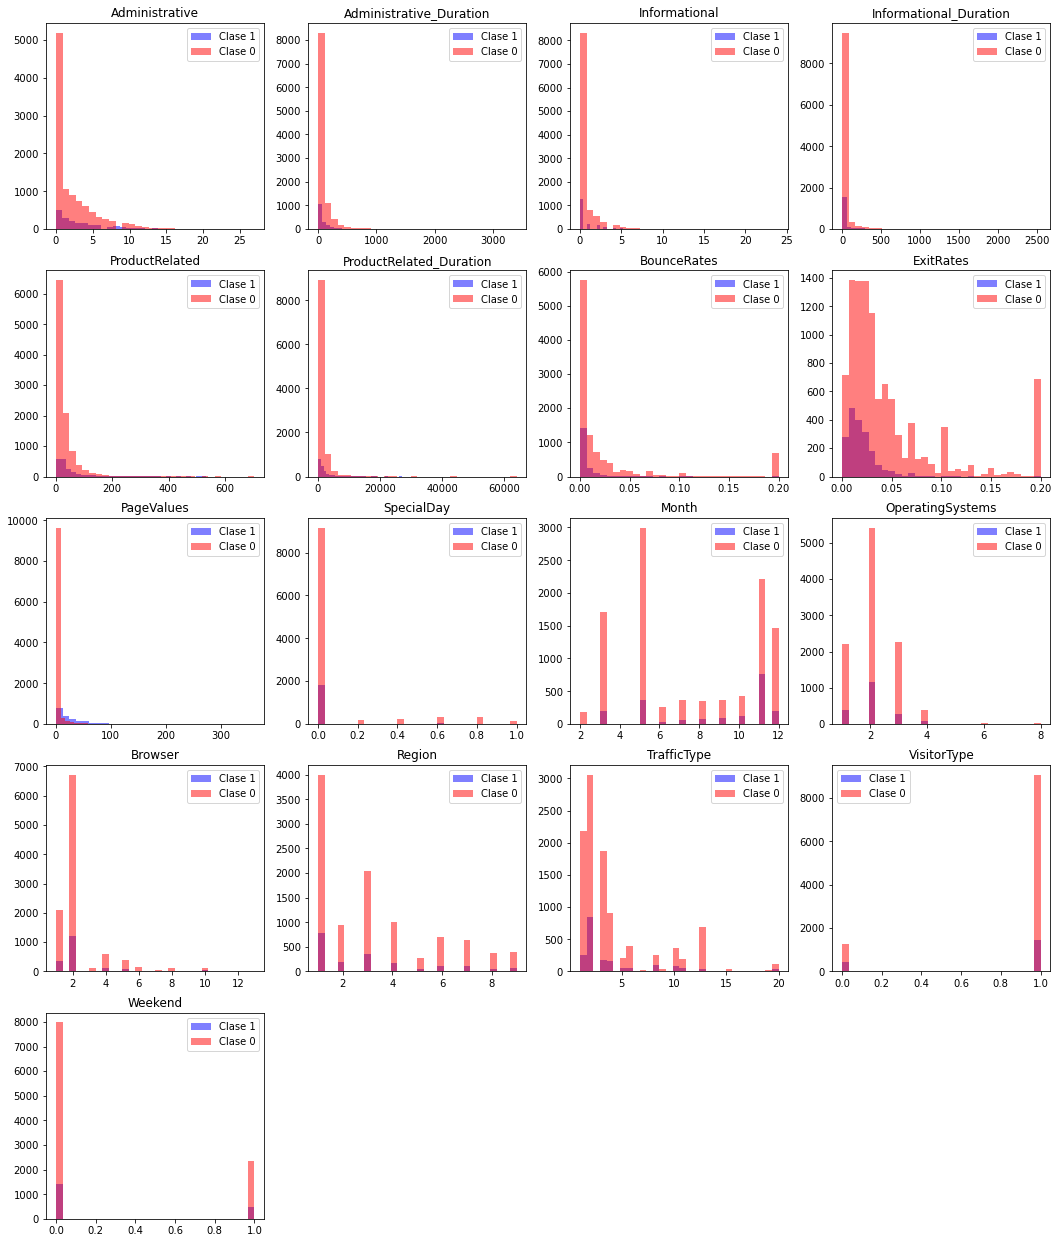

In [34]:
histograma_doble_salida(x,Y)

Por último, vamos a ver que variables tienen más correlación con las otras. Para ello vamos a hacer una matriz de correlaciones de Perason.


Cuando hay dos varibales muy correlacionadas entre ellas, nos indica que una de las dos sobra. Podemos ver para el caso de ProductRelated y ProductRelated_Duration que estan mu correlacionadas teniendo un coeficiente de 0.91. En este caso, vamos a usar ambas ya que la relación lo es perfecta. 

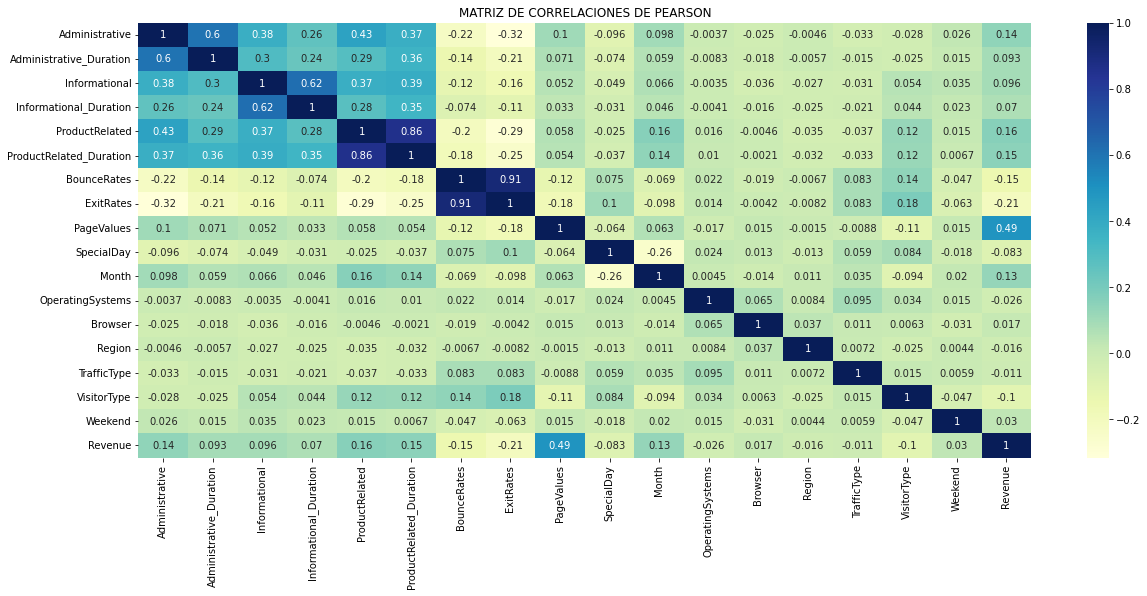

In [35]:
matriz = datos.corr(method='pearson')
plt.figure( figsize=(20, 8) )
sns.heatmap(matriz, annot=True, cmap="YlGnBu")
_ = plt.title('MATRIZ DE CORRELACIONES DE PEARSON')

## 4. ELIMINAR VARIABLES NO RELACIONADAS

Como vemos en la matriz de correlaciones, la realción entre la variable TrafficType y la variable objetivo es muy pequeña, en concreto, es de 0.005. A pesar de tener un coeficiente practicamente despreciable vamos a conservar todas las variables predictoras para este análisis.

## 5. ESTANDARIZAR DATOS

In [36]:
x_estand = StandardScaler().fit_transform(x)

## 6. TRAIN, TEST Y MODELOS

### 6.1. DIVIDIR LOS DATOS EN TRAIN Y TEST

El conjunto de datos train es el que usaremos para ajustar los distintos modelos, mientras qeu el conjunto de test es el que se utilizara para validar los mismos y obtener una métrica, lo que nos ayudará a dicidir cuale es el mejor para este conjunto de datos.

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(x_estand, Y, test_size=0.2, random_state=0)

### 6.2. MODELOS

### - **Modelo de regresión logística**

En este caso vamos a optimizar 2 parametros a través de la validación cruzada usando GridSearchCV. Para ello, necesitamos definir un modelo de regresion logistica y definir los parametros que quiero optimizar, es decir, C y Class_weight o peso de las clases

In [38]:
modelo = LogisticRegression()
parametros = {"C": [0., 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09], 
              "class_weight":['balanced', None]}

In [39]:
modelo_gs = GridSearchCV(modelo, param_grid=parametros,
                         cv = 5, scoring='roc_auc')
modelo_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                               0.08, 0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

Con la siguiente función nos dice cuales son los mejores parametros y la curva ROC.

In [40]:
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'C': 0.09, 'class_weight': 'balanced'} 
ROC AUC: 0.9


Vamos a represenar la ROC en funcion del parametro C y vemos que el valor ROC más alto es efectivamente en 0.9

In [41]:
df_search = pd.DataFrame.from_dict(modelo_gs.cv_results_)

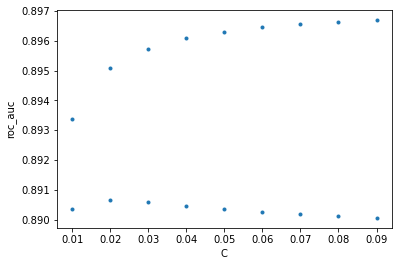

In [42]:
plt.xlabel('C')
plt.ylabel('roc_auc')
_ = plt.plot( df_search['param_C'], df_search['mean_test_score'], '.')

Ajustamos el modelo con los mejores parámetros y lo entrenamos con el conjunto de train

In [43]:
reg_log =  LogisticRegression(C=modelo_gs.best_params_['C'],
                              class_weight=modelo_gs.best_params_['class_weight'])

In [44]:
reg_log.fit(X_train, Y_train)

LogisticRegression(C=0.09, class_weight='balanced')

Predecimos las probabilidades del modelo del conjunto de test y las representamos.

In [45]:
y_test_pred_prob = reg_log.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

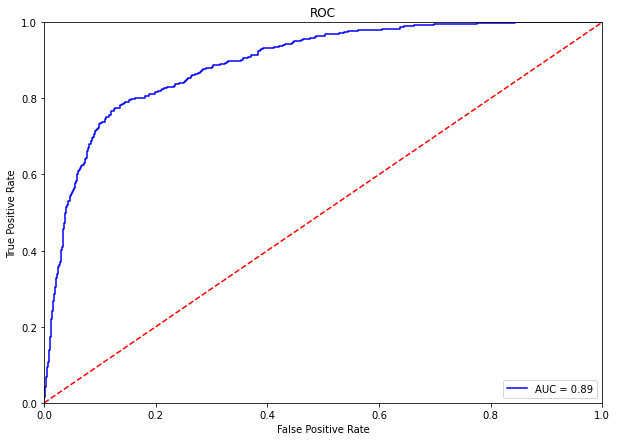

In [46]:
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

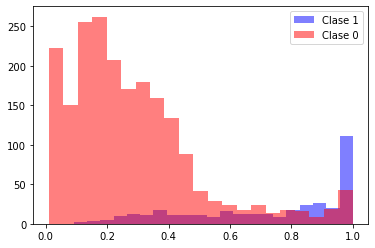

In [47]:
represento_doble_hist(y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21, density=0)

En este gráfico se representan el rosa las probabilidades asignadas a los datos que son 0 y de color morado las probabilidades asignadas a los datos sean 1. Como vemos, el modelo es bastante bueno ya que las probabilidades de ser negativo son las más bajas y las de ser positivo son las mas altas (estando la gran mayoria entorno a 1).

Por último, vamos a umbralizar las probabilidades

In [48]:
umbral = 0.7
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [49]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2)))    

Matriz de confusión
 [[1958  124]
 [ 150  215]]

Accuracy	0.89
Sensitividad	0.59
Precisión	0.63


### - **Modelo de redes neuronales**

Como en el anterior modelo, lo primero es definir el modelo, en este caso de redes neuronales, y los parametros. A continuación optimizamos los parametros con GridSearchCV.

In [50]:
modelo1 = MLPClassifier()
parametros1 = {'solver': ['lbfgs'], 
              'max_iter': [100,200,300,500], 
              'alpha': 10.0 ** -np.arange(1, 5), 
              'hidden_layer_sizes':np.arange(30, 35), 
              'random_state':[0]}

In [51]:
modelo_gs1 = GridSearchCV(modelo1, param_grid=parametros1, cv = 3, 
                         scoring='roc_auc', n_jobs=-1, verbose=10)
modelo_gs1.fit(X_train, Y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([0.1   , 0.01  , 0.001 , 0.0001]),
                         'hidden_layer_sizes': array([30, 31, 32, 33, 34]),
                         'max_iter': [100, 200, 300, 500], 'random_state': [0],
                         'solver': ['lbfgs']},
             scoring='roc_auc', verbose=10)

Visualizamos los mejores parámetros.

In [52]:
print(modelo_gs1.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'alpha': 0.01, 'hidden_layer_sizes': 32, 'max_iter': 100, 'random_state': 0, 'solver': 'lbfgs'} 
ROC AUC: 0.9


Ajustamos el modelo con los mejores parámetros y lo entrenamos.

In [53]:
mejor_modelo = MLPClassifier(**modelo_gs1.best_params_, verbose=10)

In [54]:
mejor_modelo.fit(X_train, Y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=32, max_iter=100, random_state=0,
              solver='lbfgs', verbose=10)

A continuación, predecimos las probabilidades del conjutno test y las representamos.

In [55]:
y_test_pred_prob1 = mejor_modelo.predict_proba(X_test) 
y_test_pred_prob_pos1 = y_test_pred_prob1[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg1 = y_test_pred_prob1[np.where(Y_test == 0)[0]]

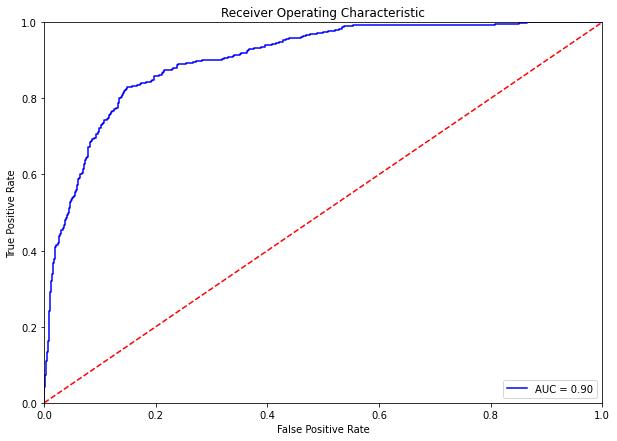

In [56]:
preds = y_test_pred_prob1[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc1 = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

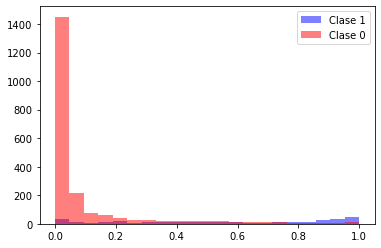

In [57]:
represento_doble_hist(y_test_pred_prob_pos1[:, 1], y_test_pred_prob_neg1[:, 1], n_bins=21, density=0)

Para finalizar, vamos a umbralizar las probabilidades

In [58]:
umbral1 = 0.4
y_umbralizadas1 = 1*(y_test_pred_prob1[:, 1] > umbral)

In [59]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas1))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas1),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas1),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas1),2)))  

Matriz de confusión
 [[2031   51]
 [ 212  153]]

Accuracy	0.89
Sensitividad	0.42
Precisión	0.75


### - **Modelo de clasificación Árbol de decisión**

En primer lugar, definimos el modelo, lo entrenemos con el conjutno train y lo representamos.

In [61]:
modelo2 = DecisionTreeClassifier()
modelo2.fit(X_train, Y_train)

DecisionTreeClassifier()

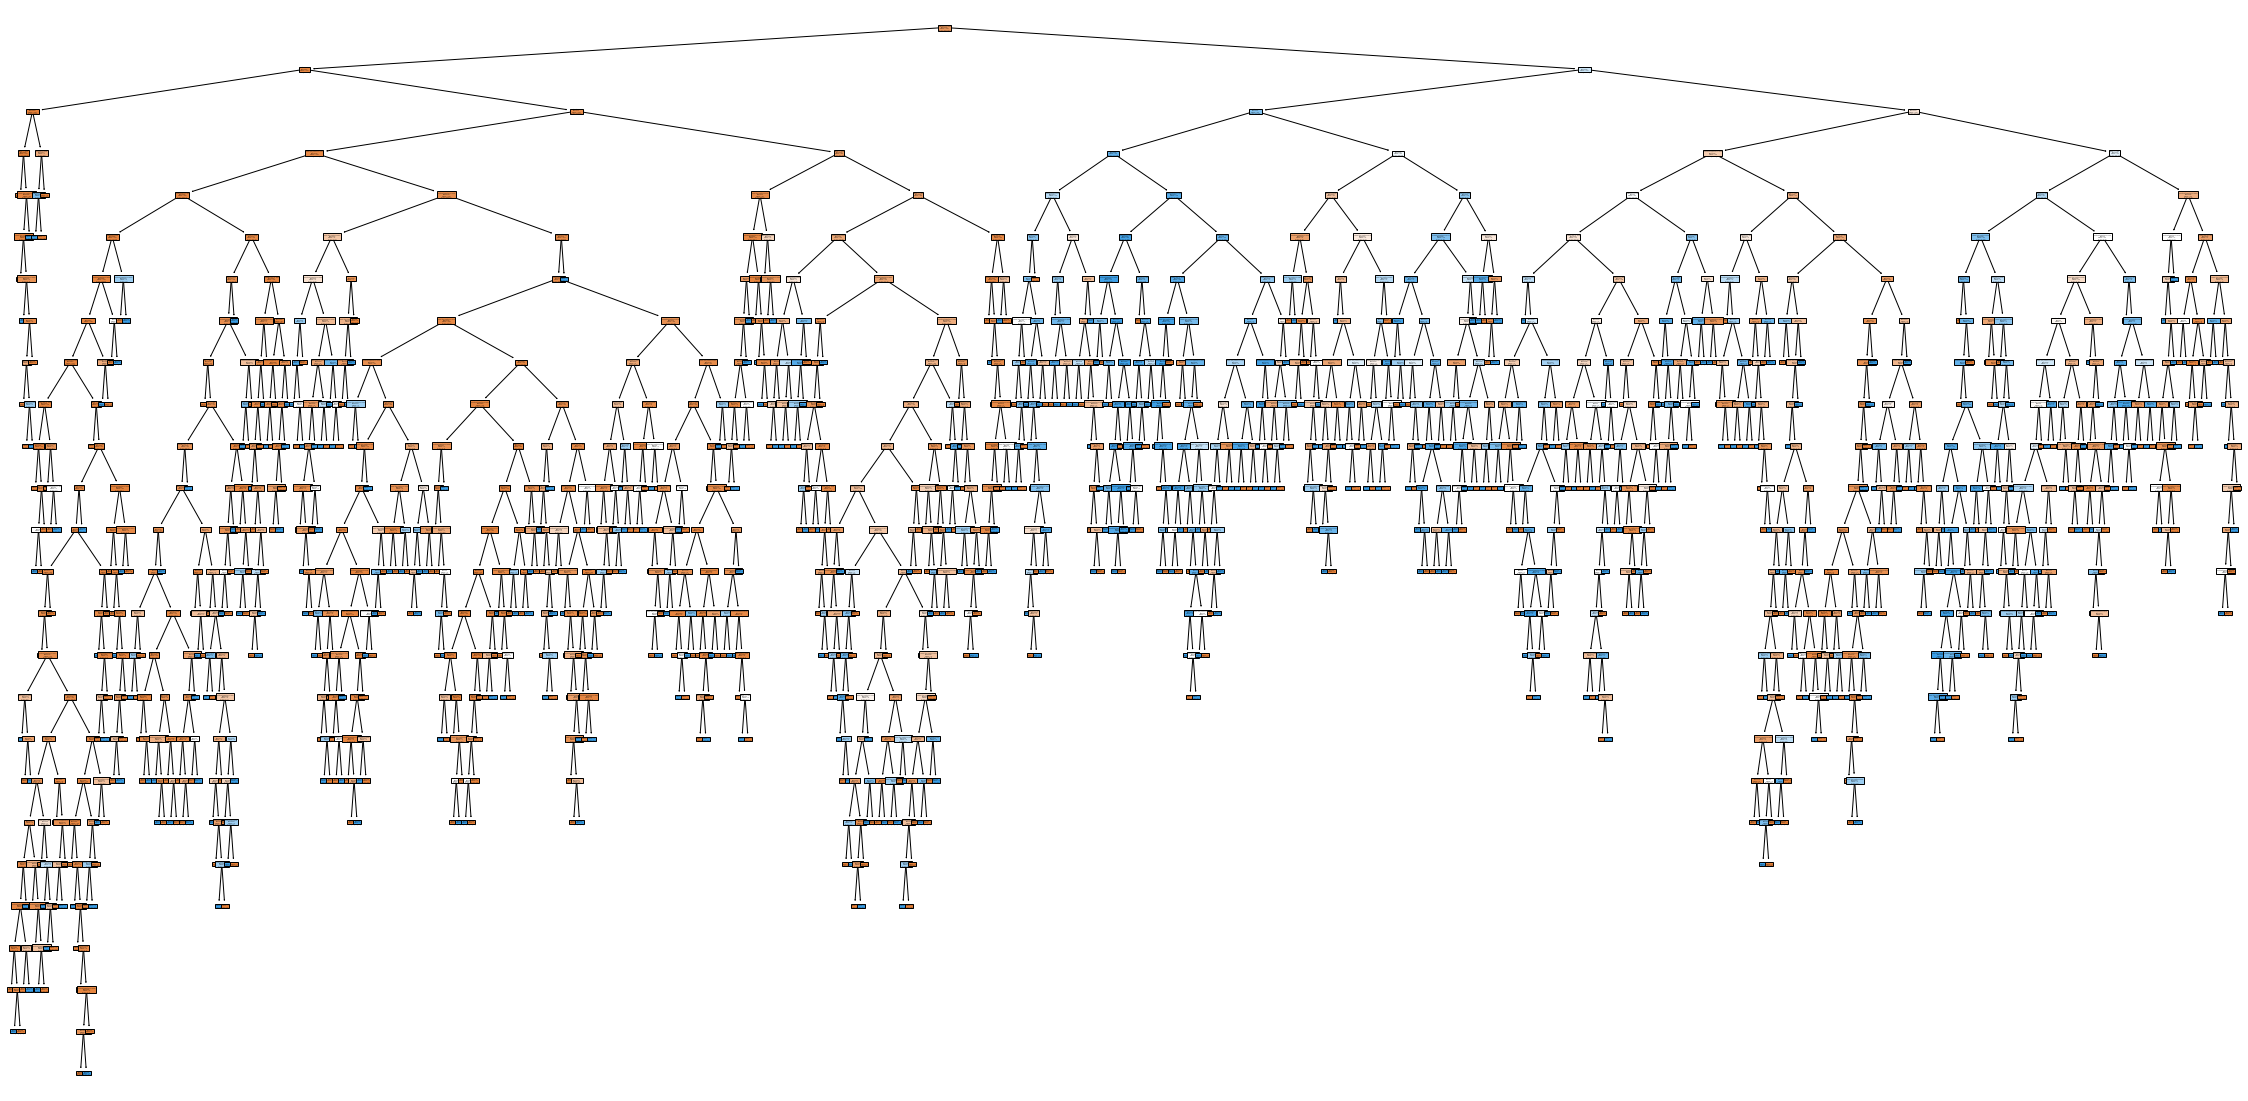

In [62]:
fig = plt.figure(figsize=(40,20))
_ = plot_tree(modelo2, feature_names=x.columns, filled=True)

Seguidamente, optimizamos el parametro de maxima depth

In [63]:
param=GridSearchCV(estimator= modelo2, param_grid={'max_depth':[3,4,5,6,7,8,9,10]}, cv=5, verbose=1)

In [64]:
param.fit(X_train,Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]}, verbose=1)

Ajustamos el modelo de árbol de decisión con el mejor parametro.

In [65]:
mejor_modelo2=param.best_estimator_
mejor_modelo2

DecisionTreeClassifier(max_depth=5)

Predecimois las probabilidades con el conjunto de datos test y las representamos.

In [66]:
y_test_pred_prob2 = mejor_modelo2.predict_proba(X_test) 
y_test_pred_prob_pos2 = y_test_pred_prob2[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg2 = y_test_pred_prob2[np.where(Y_test == 0)[0]]

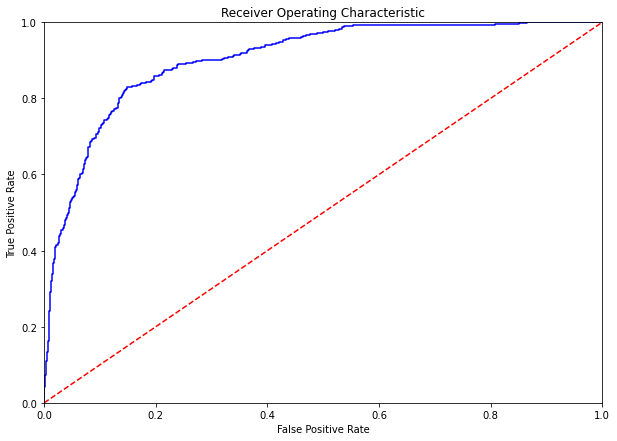

In [67]:
preds2 = y_test_pred_prob2[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc2 = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Representamos haciendo uso de un histograma las probabilidades asignadas al valor 0 y 1.

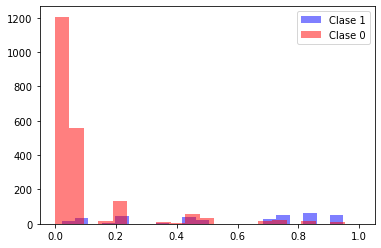

In [68]:
represento_doble_hist(y_test_pred_prob_pos2[:, 1], y_test_pred_prob_neg2[:, 1], n_bins=21, density=0)

Por último, umbralizamos las probabilidades.

In [69]:
umbral1 = 0.5
y_umbralizadas2 = 1*(y_test_pred_prob2[:, 1] > umbral)

In [70]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas2))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas2),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas2),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas2),2)))  

Matriz de confusión
 [[2015   67]
 [ 168  197]]

Accuracy	0.9
Sensitividad	0.54
Precisión	0.75


## CONCLUSIÓN

Una vez realizados los tres modelos, podemos concluir diciendo que el mejor de ellos es el árbol de decisión con una precisión de un 90%.

Comentar que los tres modelos están muy ajustados teniendo una precisión practicamente igual entre ellos. 

- Para el modelo de regresión logistica obtenemos una precisión de 89% y,

- Para el modelo de redees neuronales obtenemos la misma precision, 89%